In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [184]:
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\data science\usa real estate dataset\Sleep_health_and_lifestyle_dataset.csv")

In [185]:
df.shape

(374, 13)

In [186]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [187]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [189]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [190]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Length: 374, dtype: bool

In [191]:
df.duplicated().sum()

np.int64(0)

In [192]:
df = df.drop_duplicates()
df.shape

(374, 13)

In [193]:
df_2=df.drop(columns=['Gender','Occupation','BMI Category','Blood Pressure','Sleep Disorder'])


In [194]:
df_2.corr()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


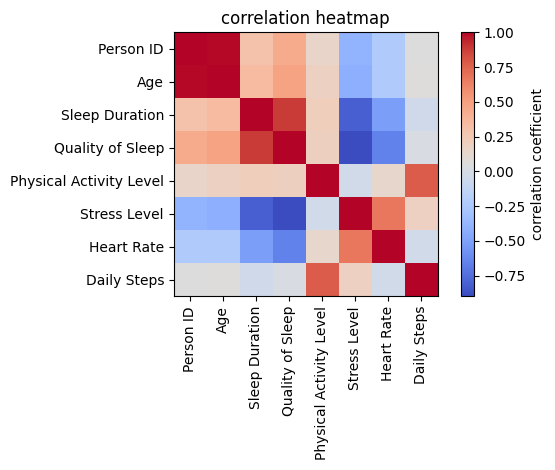

In [195]:
corr_1=df_2.corr()
plt.imshow(corr_1,cmap='coolwarm',interpolation='none')
plt.colorbar(label='correlation coefficient')
plt.xticks(range(len(corr_1)),corr_1.columns,rotation=90)
plt.yticks(range(len(corr_1)),corr_1.columns)
plt.title("correlation heatmap")
plt.tight_layout()




In [196]:
df['Sleep Duration'].min()

np.float64(5.8)

In [197]:
df['Sleep Duration'].max()

np.float64(8.5)

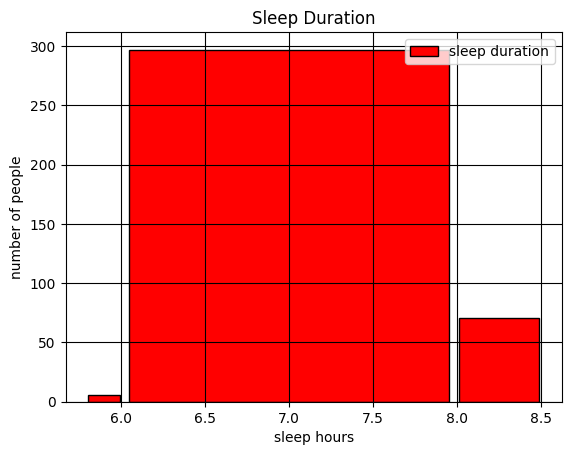

In [198]:
plt.hist(df['Sleep Duration'],color="red",bins=(5.8,6,8,8.5,),rwidth=0.95,edgecolor='black',label="sleep duration")
plt.xlabel("sleep hours")
plt.ylabel("number of people")
plt.title("Sleep Duration")
plt.legend()
plt.grid(color="black")
plt.show()

In [199]:
df_sorted_age=df.sort_values(by='Age')
df_sorted_age


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


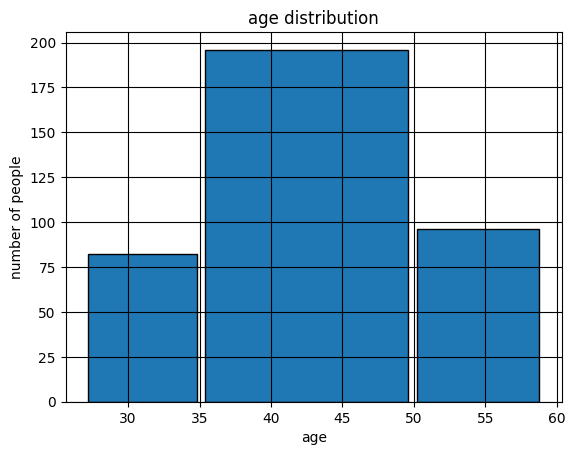

In [200]:
plt.Figure()
plt.hist(df['Age'],bins=[27,35,50,59],rwidth=0.95,edgecolor="black")
plt.grid(color="black")
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("number of people")
plt.show()


In [201]:
df['Quality of Sleep'].min()

np.int64(4)

In [202]:
df['Quality of Sleep'].max()

np.int64(9)

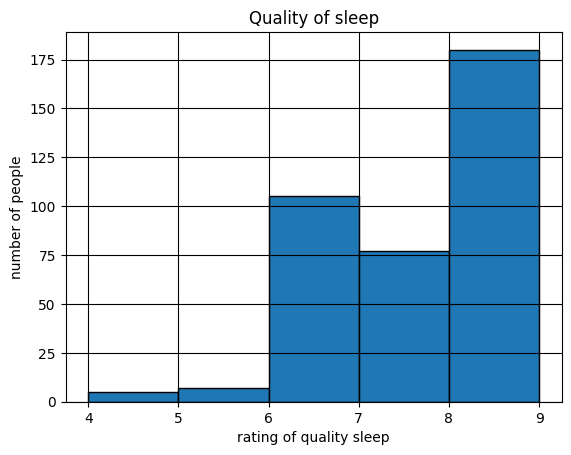

In [203]:

plt.hist(df['Quality of Sleep'],bins=[4,5,6,7,8,9],edgecolor="black")
plt.grid(color="black")
plt.title("Quality of sleep")
plt.xlabel("rating of quality sleep")
plt.ylabel("number of people")
plt.show()

In [204]:
df['Stress Level'].min()


np.int64(3)

In [205]:
df['Stress Level'].max()


np.int64(8)

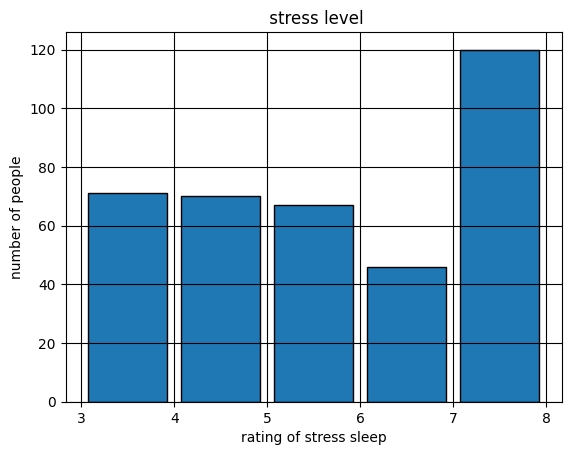

In [206]:
plt.hist(df['Stress Level'],bins=5,edgecolor="black",rwidth=0.85)
plt.grid(color="black")
plt.title(" stress level")
plt.xlabel("rating of stress sleep")
plt.ylabel("number of people")
plt.show()

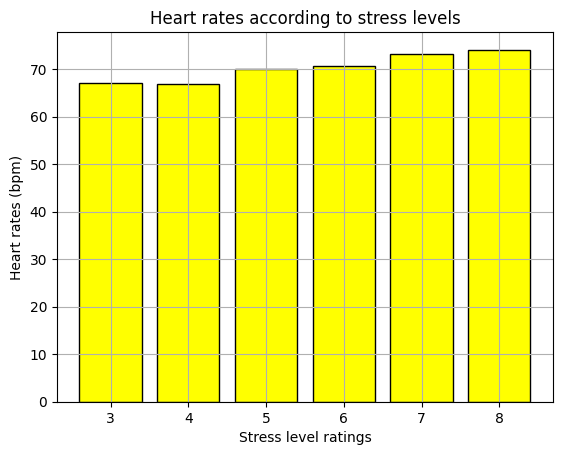

In [207]:
plt.title('Heart rates according to stress levels')
plt.xlabel("Stress level ratings")
plt.ylabel('Heart rates (bpm)')
grouped=df.groupby('Stress Level')['Heart Rate'].mean()
plt.bar(grouped.index,grouped.values,edgecolor='black',color='yellow')
plt.grid()
plt.show()

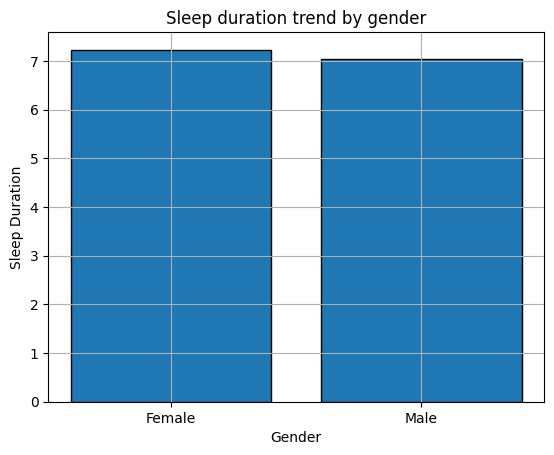

In [208]:
plt.title('Sleep duration trend by gender')
plt.ylabel('Sleep Duration')
plt.xlabel("Gender")
grouped=df.groupby('Gender')['Sleep Duration'].mean()
plt.bar(grouped.index,grouped.values,edgecolor='black')
plt.grid()
plt.show()

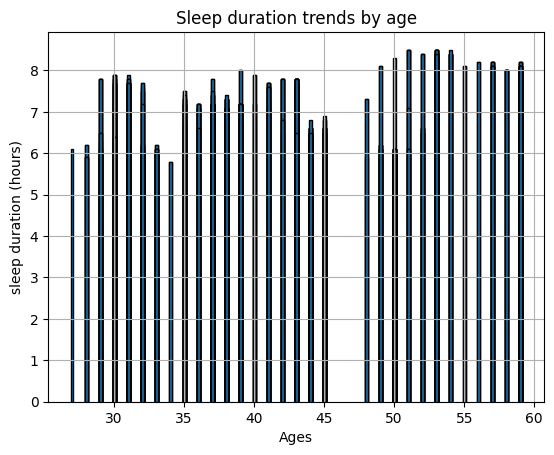

In [209]:
plt.title('Sleep duration trends by age')
plt.xlabel('Ages')
plt.ylabel('sleep duration (hours)')
plt.bar(df['Age'],df['Sleep Duration'],width=0.2,edgecolor='black')
plt.grid()

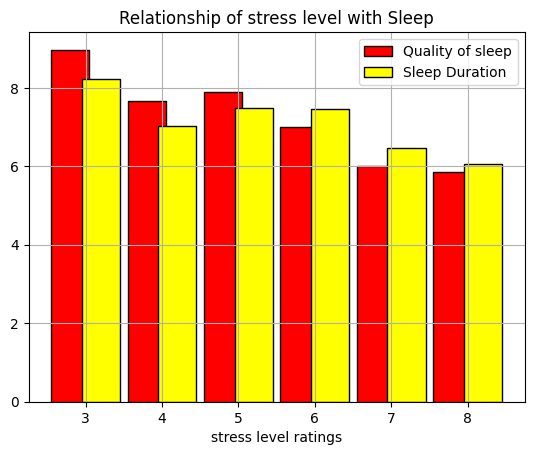

In [210]:
grouped=df.groupby('Stress Level')['Quality of Sleep'].mean()
grouped2=df.groupby('Stress Level')['Sleep Duration'].mean()
plt.title('Relationship of stress level with Sleep')
plt.xlabel('stress level ratings')
plt.bar(grouped.index-0.2,grouped.values,width=0.5,color='red',edgecolor='black',label='Quality of sleep')
plt.bar(grouped2.index+0.2,grouped2.values,width=0.5,color='yellow',edgecolor='black',label='Sleep Duration')
plt.legend()
plt.grid()

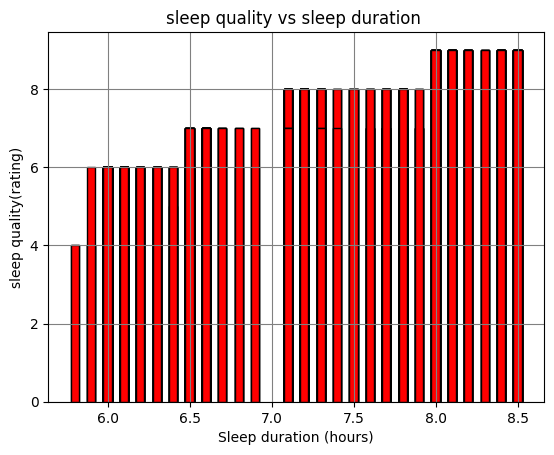

In [211]:
plt.title("sleep quality vs sleep duration ")
plt.xlabel("Sleep duration (hours)")
plt.ylabel("sleep quality(rating)")
plt.bar(df['Sleep Duration'],df['Quality of Sleep'],width=0.05,edgecolor="black",color='red')
plt.grid(color="grey")

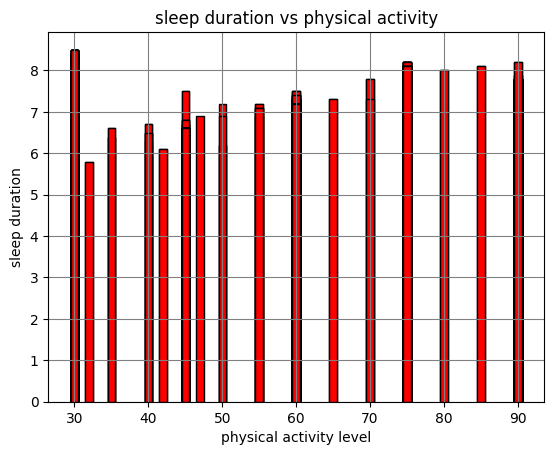

In [212]:
plt.title("sleep duration vs physical activity")
plt.xlabel("physical activity level")
plt.ylabel("sleep duration")
plt.bar(df['Physical Activity Level'],df['Sleep Duration'],width=1,edgecolor="black",color='red')
plt.grid(color="grey")

In [213]:
df.sort_values(by='Sleep Duration')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,331,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN
327,328,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN
299,300,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN
298,299,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,NaN


In [214]:
df_c=df.copy()

In [215]:
df['BMI Category'].unique()


array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [216]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

<BarContainer object of 4 artists>

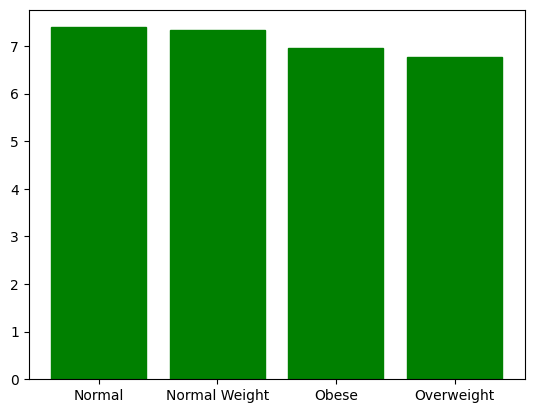

In [217]:
grouped_3=df.groupby('BMI Category')['Sleep Duration'].mean()
plt.bar(grouped_3.index,grouped_3.values,edgecolor='green',color='green')


In [218]:
df_c['BMI Category'] = df_c['BMI Category'].replace('Normal Weight', 'Normal')
df_c['BMI Category'] = df_c['BMI Category'].replace('Overweight', 'Obese')

In [219]:

df['BMI Category'].unique()


array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [220]:
df['Occupation'].unique()
df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [221]:
df_c.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [222]:
df_c['Gender']=df_c['Gender'].map({'Male':0,'Female':1})

In [223]:
df_c['BMI Category']=df_c['BMI Category'].map({'Normal':0,'Obese':1,'Underweight':-1})

In [224]:
freq_map = df_c['Occupation'].value_counts().to_dict()
df_c['Occupation_freq'] = df_c['Occupation'].map(freq_map)
freq_map

{'Nurse': 73,
 'Doctor': 71,
 'Engineer': 63,
 'Lawyer': 47,
 'Teacher': 40,
 'Accountant': 37,
 'Salesperson': 32,
 'Scientist': 4,
 'Software Engineer': 4,
 'Sales Representative': 2,
 'Manager': 1}

In [225]:
blood_map = df_c['Blood Pressure'].value_counts().to_dict()
df_c['Blood_Pressure_freq'] = df_c['Blood Pressure'].map(blood_map)
blood_map

{'130/85': 99,
 '140/95': 65,
 '125/80': 65,
 '120/80': 45,
 '115/75': 32,
 '135/90': 27,
 '140/90': 4,
 '125/82': 4,
 '128/85': 3,
 '132/87': 3,
 '117/76': 2,
 '130/86': 2,
 '126/83': 2,
 '119/77': 2,
 '135/88': 2,
 '128/84': 2,
 '131/86': 2,
 '139/91': 2,
 '115/78': 2,
 '129/84': 2,
 '142/92': 2,
 '118/75': 2,
 '118/76': 1,
 '122/80': 1,
 '121/79': 1}

In [226]:
sleep_disorder_map = df_c['Sleep Disorder'].value_counts().to_dict()
df_c['Sleep_disorder_freq'] = df_c['Sleep Disorder'].map(sleep_disorder_map)

In [227]:
df_c['Gender'] = pd.to_numeric(df_c['Gender'], errors='coerce')


In [228]:
df_c['Occupation'] = pd.to_numeric(df_c['Occupation'], errors='coerce')  


In [229]:
df_c['Blood Pressure'] = pd.to_numeric(df_c['Blood Pressure'], errors='coerce')  


In [230]:
df_c['BMI Category'] = pd.to_numeric(df_c['BMI Category'], errors='coerce')  


In [231]:
df_c['Sleep Disorder'] = pd.to_numeric(df_c['Sleep Disorder'], errors='coerce')  


In [232]:
df_c.dtypes

Person ID                    int64
Gender                       int64
Age                          int64
Occupation                 float64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                 int64
Blood Pressure             float64
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder             float64
Occupation_freq              int64
Blood_Pressure_freq          int64
Sleep_disorder_freq        float64
dtype: object

In [233]:
fill_cols = ['Gender', 'BMI Category', 'Occupation_freq', 'Blood_Pressure_freq', 'Sleep_disorder_freq']
df_c[fill_cols] = df_c[fill_cols].fillna(-1)

In [234]:
if df_c['Blood Pressure'].dtype == 'object' and df_c['Blood Pressure'].str.contains('/').any():
    bp_split = df_c['Blood Pressure'].str.split('/', expand=True)
    df_c['Systolic_BP'] = pd.to_numeric(bp_split[0], errors='coerce')
    df_c['Diastolic_BP'] = pd.to_numeric(bp_split[1], errors='coerce')
    print("Blood pressure split into Systolic and Diastolic components")

In [235]:
clean_columns = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps',
    'Gender', 'BMI Category', 'Occupation_freq', 'Blood_Pressure_freq', 'Sleep_disorder_freq'
]
df_final_clean = df_c[clean_columns].copy()


In [236]:
print(f"\nFinal dataset shape: {df_final_clean.shape}")
print(f"Missing values: {df_final_clean.isnull().sum().sum()}")
print(f"Data types:\n{df_final_clean.dtypes}")


Final dataset shape: (374, 12)
Missing values: 0
Data types:
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
Heart Rate                   int64
Daily Steps                  int64
Gender                       int64
BMI Category                 int64
Occupation_freq              int64
Blood_Pressure_freq          int64
Sleep_disorder_freq        float64
dtype: object


In [237]:
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                'Stress Level', 'Heart Rate', 'Daily Steps', 'Gender', 'BMI Category', 
                'Occupation_freq', 'Blood _Pressure_freq', 'Sleep_disorder_freq']



In [238]:
print(f"\nFinal dataset shape: {df_final_clean.shape}")
print(f"Missing values: {df_final_clean.isnull().sum().sum()}")
print(f"Data types:\n{df_final_clean.dtypes}")


Final dataset shape: (374, 12)
Missing values: 0
Data types:
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
Heart Rate                   int64
Daily Steps                  int64
Gender                       int64
BMI Category                 int64
Occupation_freq              int64
Blood_Pressure_freq          int64
Sleep_disorder_freq        float64
dtype: object


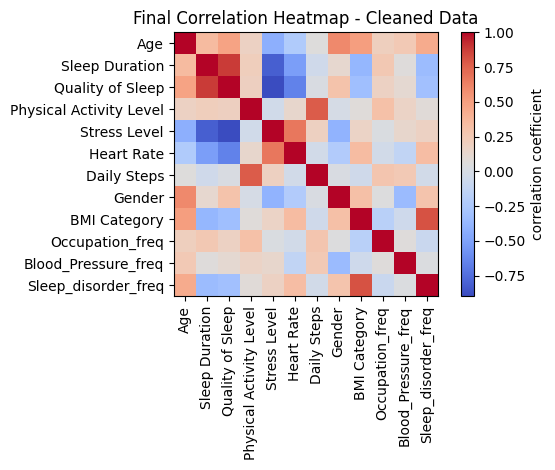

In [240]:
corr_final = df_final_clean.corr()
plt.imshow(corr_final, cmap='coolwarm', interpolation='none')
plt.colorbar(label='correlation coefficient')
plt.xticks(range(len(corr_final)), corr_final.columns, rotation=90)
plt.yticks(range(len(corr_final)), corr_final.columns)
plt.title("Final Correlation Heatmap - Cleaned Data")
plt.tight_layout()
plt.show()